## Центральная предельная теорема своими руками

Рассмотрим бета-распределение, плотность вероятности которого имеет вид:

$$f_X(x) = \frac{1}{\mathrm{B}(\alpha, \beta)}\, x^{\alpha - 1} (1-x)^{\beta - 1}$$

где $\alpha, \beta > 0$ - произвольные фиксированные параметры и

$\mathrm{B}(\alpha,\beta) = \int\limits_0^1 x^{\alpha - 1} (1-x)^{\beta - 1}\, dx $ - бета-функция

## Гистограма выборки и теоретическая плотность распределения

Зададим бета-распределение и сгенерируем выборку размера 1000. Сравним гистограму выборки с теоретической плотностью распределения. 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [79]:
a, b = 2., 5. # Произвольные параметры распределения
rv = sts.beta(a, b)

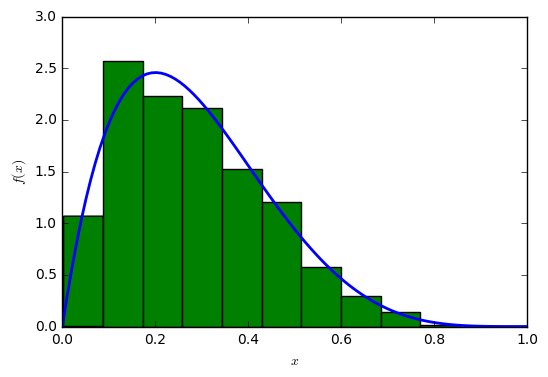

In [80]:
sample = rv.rvs(1000)

x = np.linspace(0, 1, 100)
pdf = rv.pdf(x)

plt.plot(x, pdf, linewidth = 2.)
plt.hist(sample, normed = True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Как видим из графика, гистограма выборки совпадает по форме с теоретической функцией плотности распределения.

## Центральная предельная теорема(ЦПТ)

Согласно ЦПТ, распределение выборочных средних будет приближаться следующим нормальным распределением: $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$.
Матожидание и дисперсия бета распределения:

$\mathbb{E}[X] = \frac{\alpha}{\alpha+\beta}$

$\mathrm{D}[X] = \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$



Сравним выборки размеров 5, 10, 50 и 100 с теоретической функцией плотности вероятности выборочных средних.

In [82]:
# Математическое ожидание и дисперсия бета-распределения
betta_mean = a / (a + b)
betta_variance = (a * b) / ((a + b) ** 2) * ( a + b + 1)

In [85]:
def plot_distribution(n): 
    # Генерируем выборки и рассчитываем среднее значение для каждой из них
    sample_means = []
    for _ in range(1000):
        sample = rv.rvs(n)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    
    # Нормальное распределение приближающие распределение выборочных средних
    norm_rv = sts.norm(loc = betta_mean, scale = betta_variance / n)
    x = np.linspace(0, 1, 1000)
    pdf = norm_rv.pdf(x)
    
    plt.plot(x, pdf, linewidth = 2.)
    plt.hist(sample_means, normed = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

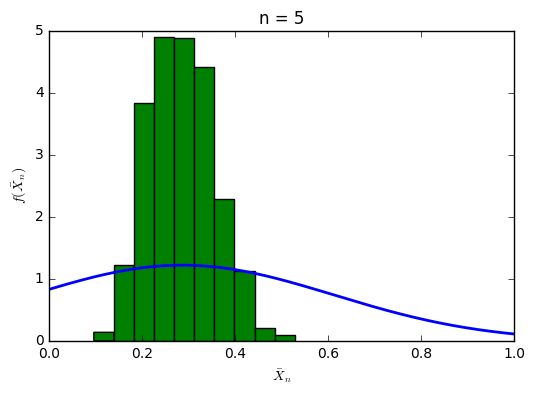

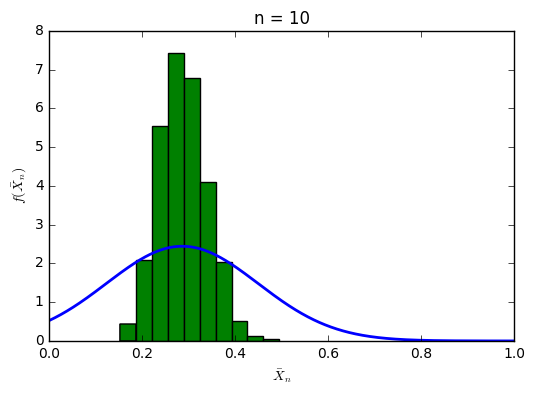

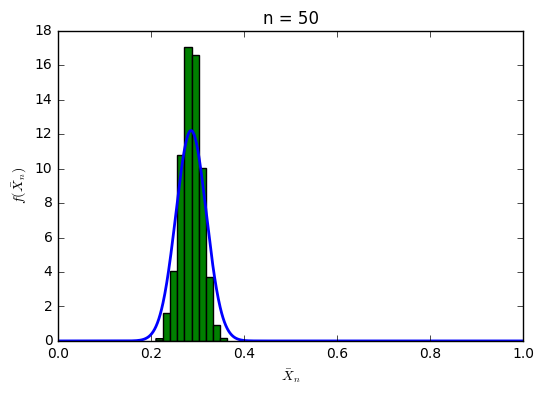

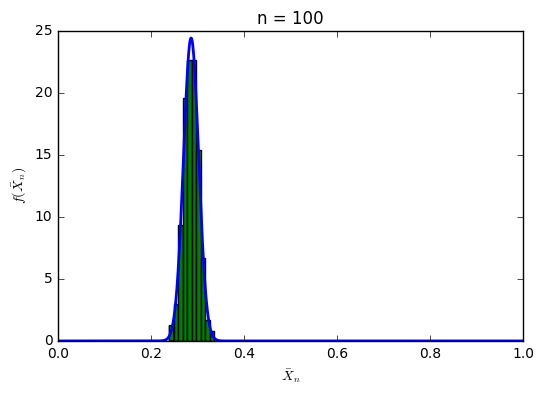

In [86]:
# Вызовем функцию с различными размерами выборок
for n in [5, 10, 50, 100]:
    plot_distribution(n)

## Заключение

Как видим из графиков, чем выше размер выборки, тем лучше теоретическая функция распределения аппроксимирует распределение выборочных средних.